# Математичні моделі в продуктовому маркетингу

## Сегментація і кластерний аналіз

###  Практична робота 2 (частина 1)

1. CRM Analytics: Customer Segmentation with RFM:

    1.1. Завантажте датасет: https://medium.com/@zbeyza/crm-analytics-customer-segmentation-with-rfm-208ddc10c623
    
    1.2. Порахуйте RFM Score.
    
    1.3. Визначте сегменти за допомогою REGEX та їх статистичні показники і частки.

**_Студентка Пороскун Олена. Група ПМ.м-21_**

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import squarify

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

excel_data_df = pandas.read_excel('records.xlsx', sheet_name='Employees')

In [3]:
df_ = pd.read_excel('online_retail_II.xlsx')
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# перевірка відсутнього значення
df.isnull().sum

# Клієнти з відсутнім ідентифікатором клієнта не можуть бути включені в процес сегментації, тому їх необхідно видалити з набору даних.
df.dropna(inplace =True)

In [5]:
# додавання загальної ціни на основі продуктів до набору даних як змінної
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [6]:
# описова статистика набору даних
df.describe().T

# тут є від'ємні значення, через повернення. потрібно їх позбутися.

,count,mean,std,min,25%,50%,75%,max
Quantity,417534.0,12.758815,101.220424,-9360.00,2.00,4.00,12.00,19152.00
Price,417534.0,3.887547,71.131797,0.00,1.25,1.95,3.75,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.00,16799.00,18287.00
TotalPrice,417534.0,19.994081,99.915863,-25111.09,4.25,11.25,19.35,15818.40


In [7]:
# в атрибуті Ivoice значення, що починаються з "C", вкажіть повернуті товари.
df = df[~df["Invoice"].str.contains("C", na=False)]

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,13997.00,15321.00,16812.00,18287.0
TotalPrice,407695.0,21.663261,77.147356,0.0,4.95,11.90,19.50,15818.4


Calculating RFM Metrics

In [9]:
df["InvoiceDate"].max()
analysis_date = dt.datetime(2023,6,5)

In [10]:
rfm = df.groupby("Customer ID").agg({"InvoiceDate": lambda invoice_date: (analysis_date - invoice_date.max()).days,
                                     "Invoice": lambda invoice: invoice.nunique(),
                                     "TotalPrice": lambda total_price: total_price.sum()})
rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,4724,11,372.86
12347.0,4562,2,1323.32
12348.0,4633,1,222.16
12349.0,4602,3,2671.14
12351.0,4570,1,300.93


In [11]:
# Це небажана ситуація, коли монетарні показники дорівнюють 0, тому їх слід усунути.
rfm = rfm[rfm["monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4312.0,4650.172542,96.861457,4560.00,4577.0000,4612.00,4695.0000,4933.00
frequency,4312.0,4.455705,8.170213,1.00,1.0000,2.00,5.0000,205.00
monetary,4312.0,2048.238236,8914.481280,2.95,307.9875,706.02,1723.1425,349164.35


Calculating RFM Scores

In [12]:
rfm["recency_score"]   = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"]  = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
Customer ID,,,,,,,
12346.0,4724,11,372.86,2,5,2,25
12347.0,4562,2,1323.32,5,2,4,52
12348.0,4633,1,222.16,2,1,1,21
12349.0,4602,3,2671.14,3,3,5,33
12351.0,4570,1,300.93,5,1,2,51


In [13]:
# перетворення RF_SCORE в сегмент за допомогою Regex
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
Customer ID,,,,,,,,
12346.0,4724,11,372.86,2,5,2,25,cant_loose
12347.0,4562,2,1323.32,5,2,4,52,potential_loyalists
12348.0,4633,1,222.16,2,1,1,21,hibernating
12349.0,4602,3,2671.14,3,3,5,33,need_attention
12351.0,4570,1,300.93,5,1,2,51,new_customers


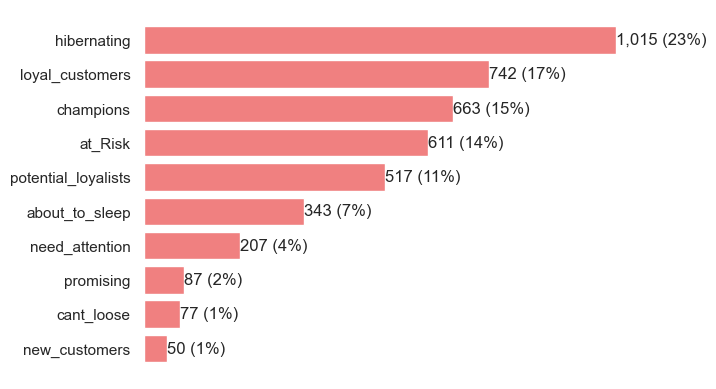

In [14]:
# скільки сегментів і який їхній відсоток
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='lightcoral')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show(block=True)

In [15]:
segments_counts.index

Index(['new_customers', 'cant_loose', 'promising', 'need_attention',
       'about_to_sleep', 'potential_loyalists', 'at_Risk', 'champions',
       'loyal_customers', 'hibernating'],
      dtype='object')

In [16]:
segments_counts.values

array([  50,   77,   87,  207,  343,  517,  611,  663,  742, 1015],
      dtype=int64)

In [17]:
segments_counts.describe()

count      10.000000
mean      431.200000
std       329.668116
min        50.000000
25%       117.000000
50%       430.000000
75%       650.000000
max      1015.000000
Name: segment, dtype: float64

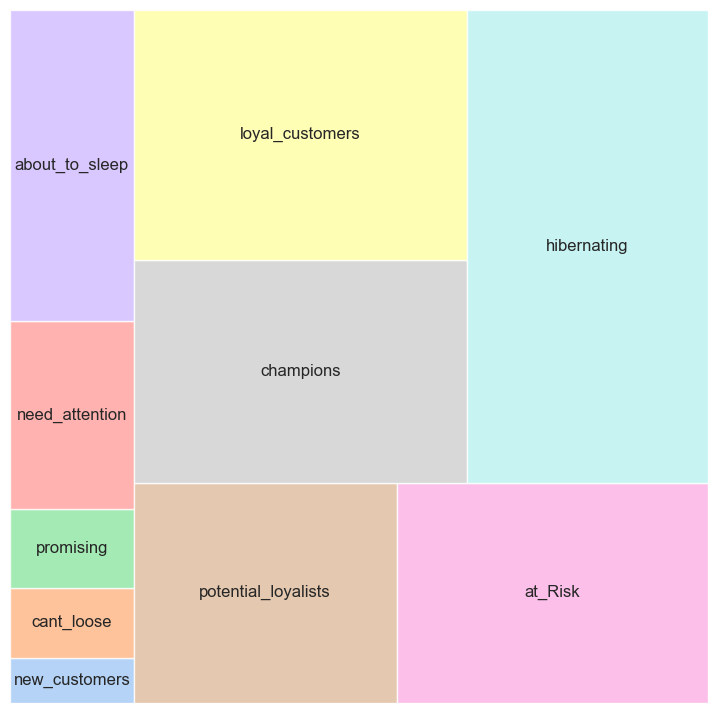

In [18]:
fig, ax = plt.subplots(1, figsize = (9,9))
colors = sns.color_palette('pastel')[0:11]
squarify.plot(sizes=segments_counts.values, 
              label=segments_counts.index, 
              color = colors,
              alpha=.8)
plt.axis('off')
plt.show()

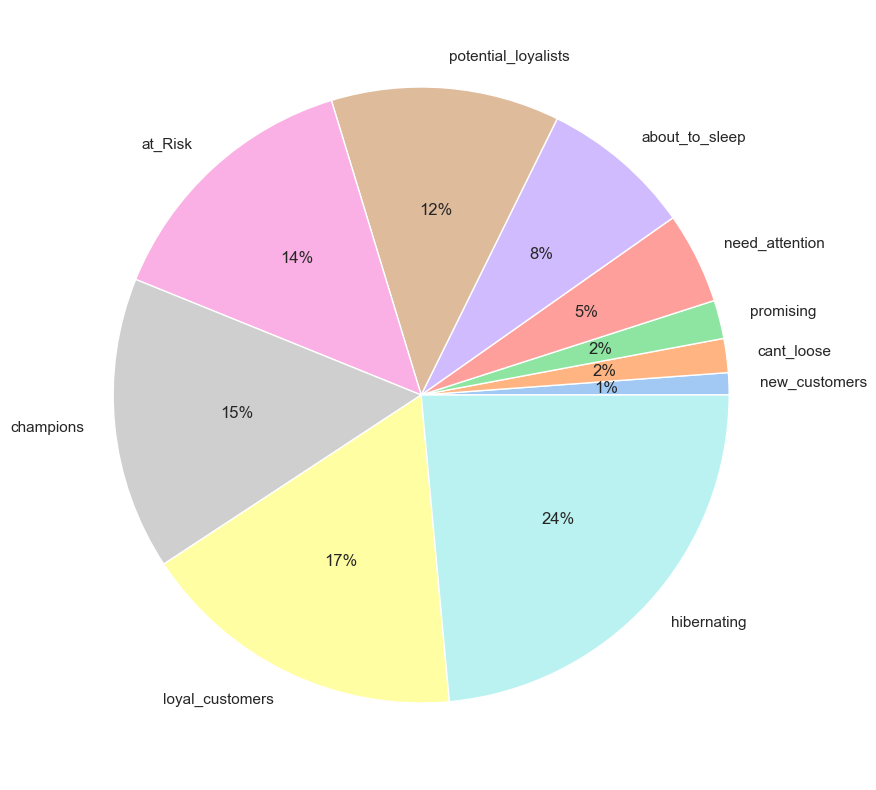

In [19]:
plt.figure(figsize = (10,10))
colors = sns.color_palette('pastel')[0:11]
plt.pie(segments_counts.values,
        labels=segments_counts.index,
        colors = colors,
        autopct='%.0f%%')
plt.show()

_________________________________________________________________________________________________________________________